# Restoring Images

In [9]:
from skimage.restoration import inpaint
from skimage.util import random_noise
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

## Damage an Image
***

In [2]:
cat_original = data.chelsea()
# destroy some pixels...
def damage_img_region(
        img,
        bboxes=[[0, 0, 30, 30], [150, 390, 200, 440], [230, 260, 280, 280]]
        ):
    img_out = img.copy()
    for bbox in bboxes:
        # set all channel black
        img_out[bbox[0]:bbox[2], bbox[1]:bbox[3]] = (0,0,0) 
    return (img_out, bboxes)    

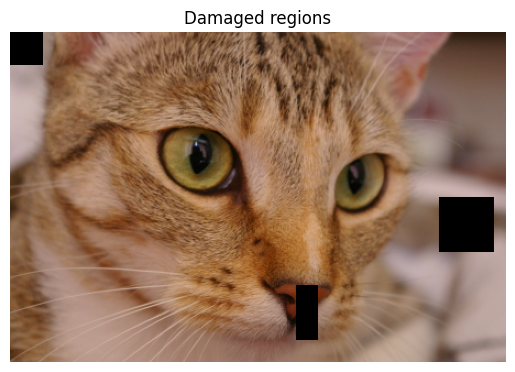

In [3]:
damaged_cat, dmg_zones = damage_img_region(cat_original)
plt.imshow(damaged_cat)
plt.axis("off")
plt.title("Damaged regions")
plt.show()

## Restore
***

`inpaint_biharmonic` will require a mask array, 
with the same height & width dimensions as the image. Though if the image is
multichannel, the mask must be single channel.
Damages areas of the array must have the value 1, while areas that do not
require inpainting would be 0. 

In [4]:
# get a mask that captures the damaged zones as 1
mask = np.zeros(damaged_cat.shape)
for zone in dmg_zones:
    mask[zone[0]:zone[2],zone[1]:zone[3]] = (1,1,1)

In [5]:
restored_cat = inpaint.inpaint_biharmonic(
    damaged_cat,
    mask=mask[:, :, 0], # weird - mask only takes single channel
    multichannel=True)


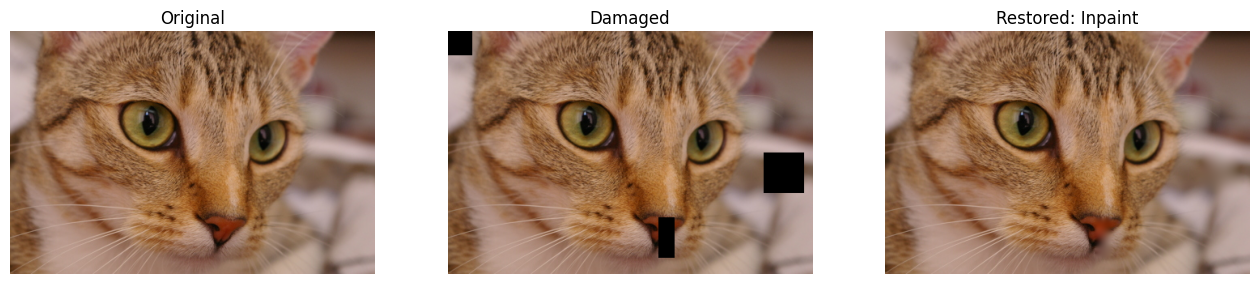

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3, figsize=(16,8), sharex=True, sharey=True
    )
ax1.imshow(cat_original)
ax2.imshow(damaged_cat)
ax3.imshow(restored_cat)
for a in (ax1, ax2, ax3):
    a.axis("off")
ax1.set_title("Original")
ax2.set_title("Damaged")
ax3.set_title("Restored: Inpaint")
plt.show()

### Remove an Element


In [7]:
coins = data.coins()
msk = np.zeros(coins.shape)
msk[245:290, 330:385] = 1
coin_removed = inpaint.inpaint_biharmonic(coins, mask=msk, multichannel=False)

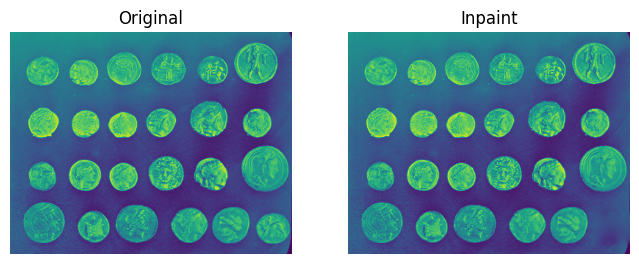

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
ax1.imshow(coins)
ax1.axis("off")
ax1.set_title("Original")
ax2.imshow(coin_removed)
ax2.axis("off")
ax2.set_title("Inpaint")
plt.show()

## Working With Noise
***

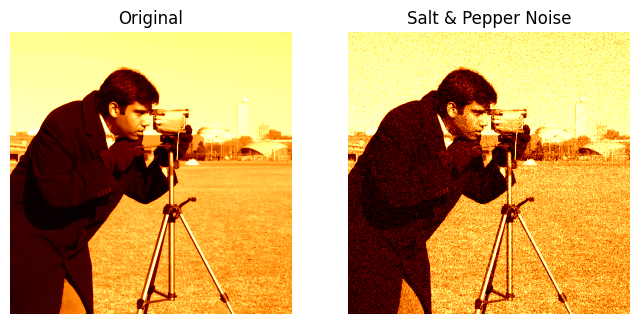

In [25]:
cam = data.camera()
cam_noised = random_noise(cam)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
ax1.axis("off")
ax2.axis("off")
ax1.set_title("Original")
ax2.set_title("Salt & Pepper Noise")
ax1.imshow(cam, cmap="afmhot")
ax2.imshow(cam_noised, cmap="afmhot")
plt.show()